# Jonathan Halverson
# Friday, April 15, 2016
# Linear discriminant analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

LDA like PCA is a feature extraction technique that can be used to increase computational efficiency and reduce overfitting. Unlike PCA, LDA is supervised meaning it works with the class labels. While PCA finds the orthogonal axes that maximize the variance and projects the data onto this subspace, LDA aims to find the feature subspace that optimizes class separability.

LDA assumes:

1. The data is normally distributed
2. The classes have identical covariance matrices
3. The features are independent of each other

The main steps to LDA are:

1. Standardize the data (n samples, d features)
2. Compute the mean vector for each class (size d)
3. Compute the between-class scatter matrix and the in-class scatter matrix
4. Compute the eigenvectors and eigenvalues of $S_w^{-1}S_b$
5. Form a transformation matrix from the eigenvectors with the largest eigenvalues
6. Project the samples onto the new feature subspace

In [2]:
columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', \
           'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.csv', names=columns)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Check assumptions

In [3]:
xf = df.iloc[:,1:]
xf = (xf - xf.mean()) / xf.std()
xf.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224


In [4]:
xf.describe().applymap(lambda x: round(x, 1))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-1.4,-3.7,-2.7,-2.1,-2.1,-1.7,-1.9,-2.1,-1.6,-2.1,-1.9,-1.5
25%,-0.8,-0.7,-0.6,-0.7,-0.8,-0.9,-0.8,-0.7,-0.6,-0.8,-0.8,-0.9,-0.8
50%,0.1,-0.4,-0.0,0.0,-0.1,0.1,0.1,-0.2,-0.1,-0.2,0.0,0.2,-0.2
75%,0.8,0.7,0.7,0.6,0.5,0.8,0.8,0.6,0.6,0.5,0.7,0.8,0.8
max,2.3,3.1,3.1,3.1,4.4,2.5,3.1,2.4,3.5,3.4,3.3,2.0,3.0


In [5]:
xf.skew()

Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

In [6]:
xf.kurt()

Alcohol                        -0.852500
Malic acid                      0.299207
Ash                             1.143978
Alcalinity of ash               0.487942
Magnesium                       2.104991
Total phenols                  -0.835627
Flavanoids                     -0.880382
Nonflavanoid phenols           -0.637191
Proanthocyanins                 0.554649
Color intensity                 0.381522
Hue                            -0.344096
OD280/OD315 of diluted wines   -1.086435
Proline                        -0.248403
dtype: float64

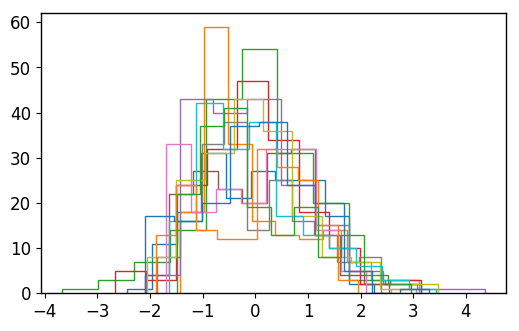

In [7]:
for column in xf.columns:
     plt.hist(xf[column], histtype='step')

(array([  1.,  11.,  18.,  31.,  21.,  27.,  25.,  25.,  17.,   2.]),
 array([-2.42738798, -1.95930769, -1.4912274 , -1.02314711, -0.55506682,
        -0.08698653,  0.38109375,  0.84917404,  1.31725433,  1.78533462,
         2.25341491]),
 <a list of 10 Patch objects>)

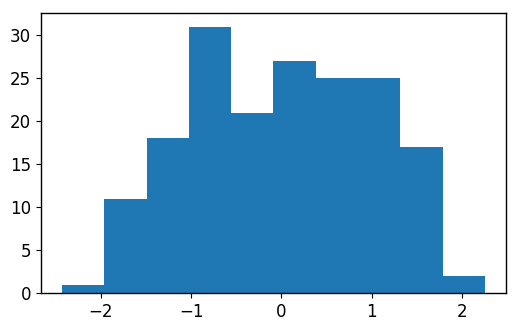

In [8]:
plt.hist(xf.Alcohol)

     a2 is the Anderson-Darling test statistic
     critical is the critical values for this distribution
     sig is the significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.

The test statistic is 1.03 which we see just less than the 1% significance level so we would accept the null hypothesis at alpha = 0.01 but reject it at 0.05. So this distribution is borderline normal.

In [9]:
from scipy.stats import anderson
a2, crit, sig = anderson(xf.Alcohol, 'norm')
a2, crit, sig

(1.0335351937409314,
 array([ 0.564,  0.642,  0.77 ,  0.899,  1.069]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

(array([ 18.,  59.,  33.,  16.,  13.,  12.,  14.,   7.,   3.,   3.]),
 array([-1.42895215, -0.97601228, -0.52307242, -0.07013256,  0.3828073 ,
         0.83574717,  1.28868703,  1.74162689,  2.19456675,  2.64750662,
         3.10044648]),
 <a list of 10 Patch objects>)

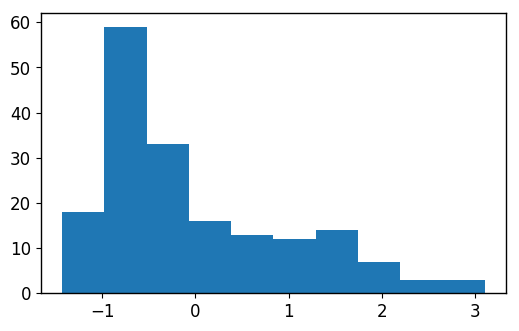

In [10]:
plt.hist(xf['Malic acid'])

We see a huge a2 score which suggests this is not normal.

In [11]:
a2, crit, sig = anderson(xf['Malic acid'], 'norm')
a2, crit, sig

(7.6192512830098167,
 array([ 0.564,  0.642,  0.77 ,  0.899,  1.069]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

(array([  4.,  43.,  40.,  43.,  24.,  15.,   5.,   2.,   1.,   1.]),
 array([-2.08238105, -1.43823537, -0.7940897 , -0.14994402,  0.49420165,
         1.13834733,  1.78249301,  2.42663868,  3.07078436,  3.71493003,
         4.35907571]),
 <a list of 10 Patch objects>)

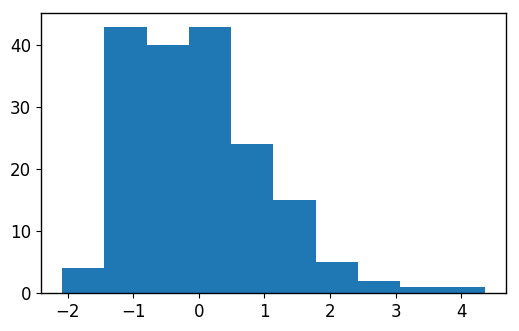

In [12]:
plt.hist(xf.Magnesium)

In [13]:
for column in xf.columns:
     a2, crit, sig = anderson(xf[column], 'norm')
     print column, '%.2f' % a2, a2 < crit[4]

Alcohol 1.03 True
Malic acid 7.62 False
Ash 0.68 True
Alcalinity of ash 0.50 True
Magnesium 2.33 False
Total phenols 1.42 False
Flavanoids 2.47 False
Nonflavanoid phenols 2.17 False
Proanthocyanins 0.70 True
Color intensity 2.84 False
Hue 0.84 True
OD280/OD315 of diluted wines 3.50 False
Proline 4.10 False


We see that most of the feature are not normally distributed.

### Check for equality of covariance matrices

In [14]:
xf[df['class'] == 1].cov().applymap(lambda x: round(x, 1))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,0.3,-0.0,-0.1,-0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.0,0.0,0.1
Malic acid,-0.0,0.4,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,0.1,-0.2
Ash,-0.1,0.0,0.7,0.3,0.2,0.0,-0.0,0.2,-0.1,-0.1,0.1,-0.0,-0.0
Alcalinity of ash,-0.1,0.0,0.3,0.6,0.1,-0.1,-0.1,0.1,-0.1,-0.1,0.0,-0.0,-0.1
Magnesium,0.1,0.0,0.2,0.1,0.5,0.1,0.0,0.1,-0.0,0.1,-0.0,0.0,-0.1
Total phenols,0.1,-0.0,0.0,-0.1,0.1,0.3,0.2,-0.0,0.1,0.2,-0.1,0.0,0.1
Flavanoids,0.1,-0.0,-0.0,-0.1,0.0,0.2,0.2,-0.0,0.2,0.2,0.0,-0.0,0.1
Nonflavanoid phenols,0.0,-0.0,0.2,0.1,0.1,-0.0,-0.0,0.3,-0.1,-0.0,0.1,-0.1,-0.0
Proanthocyanins,0.1,-0.0,-0.1,-0.1,-0.0,0.1,0.2,-0.1,0.5,0.2,0.0,0.0,0.1
Color intensity,0.1,-0.1,-0.1,-0.1,0.1,0.2,0.2,-0.0,0.2,0.3,0.0,-0.1,0.2


In [15]:
xf[df['class'] == 2].cov().applymap(lambda x: round(x, 1))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,0.4,-0.0,-0.2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.1,-0.0,-0.1,0.0
Malic acid,-0.0,0.8,0.2,0.2,-0.1,0.0,0.1,0.1,0.2,-0.1,-0.3,0.1,-0.1
Ash,-0.2,0.2,1.3,0.8,0.2,0.1,0.3,0.3,0.1,0.0,-0.0,0.1,0.0
Alcalinity of ash,-0.0,0.2,0.8,1.0,0.0,0.1,0.2,0.2,0.1,-0.0,-0.1,0.3,-0.0
Magnesium,-0.0,-0.1,0.2,0.0,1.4,0.1,0.0,-0.2,0.4,0.0,0.1,-0.1,0.3
Total phenols,-0.0,0.0,0.1,0.1,0.1,0.8,0.5,-0.4,0.4,0.1,0.0,0.3,0.0
Flavanoids,-0.0,0.1,0.3,0.2,0.0,0.5,0.5,-0.2,0.4,0.1,-0.0,0.3,-0.0
Nonflavanoid phenols,-0.0,0.1,0.3,0.2,-0.2,-0.4,-0.2,1.0,-0.3,0.0,-0.0,-0.3,-0.1
Proanthocyanins,-0.1,0.2,0.1,0.1,0.4,0.4,0.4,-0.3,1.1,-0.0,-0.1,0.3,0.1
Color intensity,0.1,-0.1,0.0,-0.0,0.0,0.1,0.1,0.0,-0.0,0.2,-0.0,-0.0,0.0


In [16]:
xf[df['class'] == 3].cov().applymap(lambda x: round(x, 1))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,0.4,0.1,0.1,0.1,-0.0,0.1,0.0,0.0,0.2,0.2,-0.0,0.0,-0.0
Malic acid,0.1,0.9,0.0,0.1,-0.1,-0.1,-0.1,0.1,-0.2,-0.2,0.0,0.0,0.0
Ash,0.1,0.0,0.5,0.3,0.1,0.2,0.1,-0.0,0.1,0.1,0.1,0.1,-0.0
Alcalinity of ash,0.1,0.1,0.3,0.5,0.1,0.1,0.1,-0.0,0.1,0.1,0.0,0.0,-0.0
Magnesium,-0.0,-0.1,0.1,0.1,0.6,-0.0,0.1,-0.4,0.1,0.1,0.0,-0.1,0.1
Total phenols,0.1,-0.1,0.2,0.1,-0.0,0.3,0.0,0.2,0.3,0.2,-0.0,0.0,0.0
Flavanoids,0.0,-0.1,0.1,0.1,0.1,0.0,0.1,-0.2,0.1,0.1,-0.0,-0.0,-0.0
Nonflavanoid phenols,0.0,0.1,-0.0,-0.0,-0.4,0.2,-0.2,1.0,0.1,0.0,0.1,0.1,0.1
Proanthocyanins,0.2,-0.2,0.1,0.1,0.1,0.3,0.1,0.1,0.5,0.5,-0.2,-0.0,0.1
Color intensity,0.2,-0.2,0.1,0.1,0.1,0.2,0.1,0.0,0.5,1.0,-0.3,-0.0,0.0


We see there are discrepancies.

In [17]:
X = df.iloc[:,1:].values
y = df['class'].values

In [18]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_std_lda = lda.fit_transform(X_std, y)

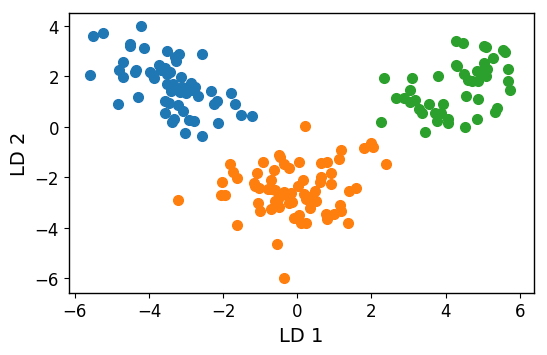

In [20]:
plt.scatter(X_std_lda[y==1, 0], X_std_lda[y==1, 1])
plt.scatter(X_std_lda[y==2, 0], X_std_lda[y==2, 1])
plt.scatter(X_std_lda[y==3, 0], X_std_lda[y==3, 1])
plt.xlabel('LD 1')
plt.ylabel('LD 2')

In the figure above it is clear that the classes are linearly separable.